# Iris analysis
## By Krzysztof Kleszcz

## Introduction 💡
It is a pleasure to have you here. Let us explore the fascinating realm of irises. . This dataset offers insights into the beauty of Iris species, featuring information on three unique varieties.

* Iris setosa
* Iris versicolor
* Iris virginica.

This dataset shows precise measurements of four key features: 

* Sepal Length (cm)
* Sepal Width (cm)
* Petal Length (cm)
* Petal Width (cm)is! 🔎

Each row corresponds to a single flower, with measurements indicated in centimeters. In this study, we aim to explore the relationships among various classes of irises. We are prepared to commence the analysis.
Let's begin the analysis! 🔎

Just in case, please see table of contents:

1. General Data Overview 📊
2. Analysis of Missing Values 📈
3. Single Variable Analysis 🔍
4. Data Transformation 🔄
5. Analysis of Relationships Between Data 🔍
6. Outlier Analysis 📊
7. Analysis Summary 📋

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. General Data Overview 📊
* We simplify the names to make them easier to use. 
* Displaying 10 sample rows to provide a general overview of the data. 
* All data, except for the class column, are numerical.

In [28]:
# We load the data and use a separator to correctly read it into the table
df = pd.read_csv('25__iris.csv', sep=",")
# We change the column names to Polish - they are shorter and easier to understand for a Polish client.
df.columns = ('długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka', 'klasa')
#Wyświetlamy próbkę danych, by zobaczyć z jakimi danymi mamy do czynienia.
df.sample(10)

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
66,5.6,3.0,4.5,1.5,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor


* We can observe that there are 150 records in each column, and the data is diverse.


In [5]:
df.describe()

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* The values in the first four columns are quite diverse. 
* In the last column, we have only three distinct classes. 
* This column can be used for grouping the data.

In [6]:
df.nunique()

długość kielicha      35
szerokość kielicha    23
długość płatka        43
szerokość płatka      22
klasa                  3
dtype: int64

The dataset is very balanced - each class has exactly 50 records. 📊

In [7]:
df["klasa"].value_counts()

klasa
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 2. Analysis of Missing Values 📈
We have no missing values.

In [8]:
df.isnull().sum()

długość kielicha      0
szerokość kielicha    0
długość płatka        0
szerokość płatka      0
klasa                 0
dtype: int64

## 3. Single Variable Analysis 🔍 
We can observe that the length and width of the sepal are generally larger than the length and width of the petal.

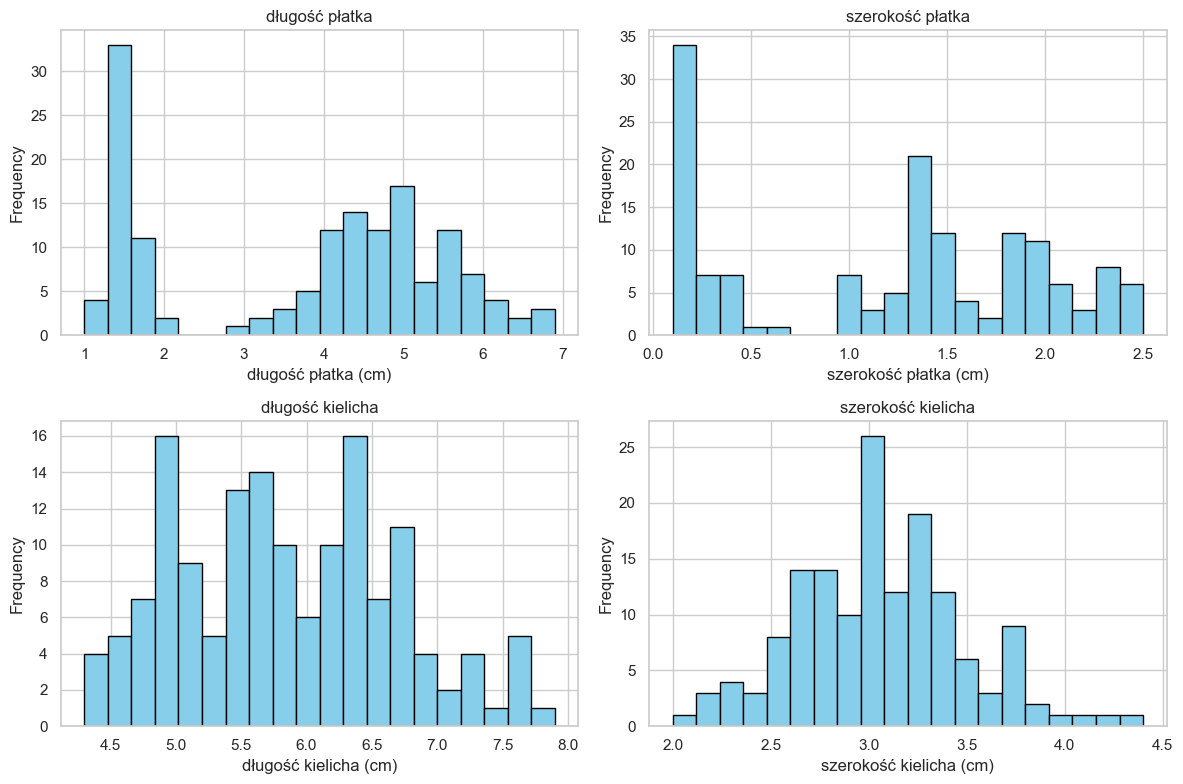

In [94]:
columns = ['długość płatka', 'szerokość płatka', 'długość kielicha', 'szerokość kielicha']

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 

for ax, col in zip(axs.flatten(), columns):
    ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col} (cm)')
    ax.set_ylabel('Frequency')

fig.tight_layout()

plt.show()



## 4. Data Transformation 🔄 
Not necessary, as we have no missing values.

## 5. Analysis of Relationships Between Data 🔍

* The values for Iris-versicolor and Iris-virginica are quite similar when comparing sepal length and sepal width (slightly larger for Iris-virginica).
* Iris-setosa stands out in terms of sepal length and width—it has the largest width and the smallest length.
* When comparing petal length and width, the data for each group is very diverse, with each group having unique values.
* Iris-setosa has the smallest petal length but is characterized by a larger sepal width.
* Iris-versicolor has similar lengths to Iris-virginica.

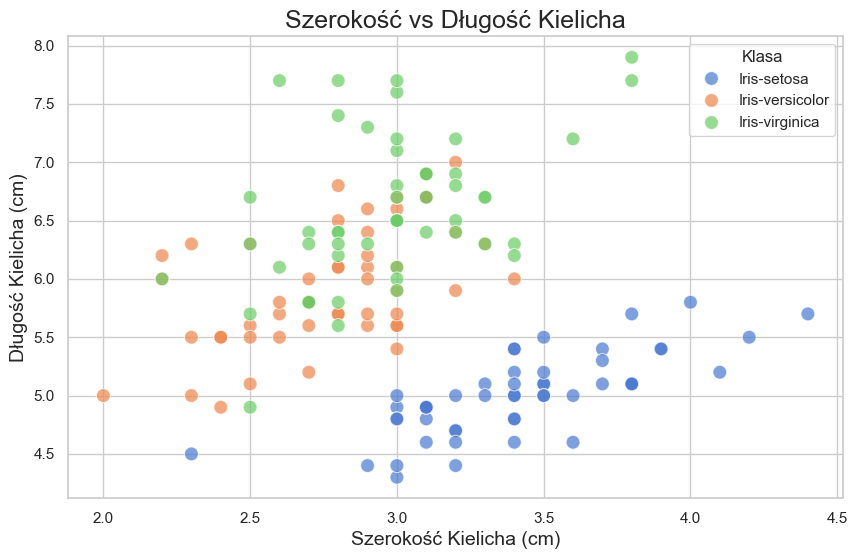

In [75]:
sns.set(style="whitegrid", palette="muted")

# Scatterplot dla szerokości i długości kielicha
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='szerokość kielicha', 
    y='długość kielicha', 
    hue='klasa', 
    data=df,
    s=100,  # rozmiar markerów
    edgecolor='w',  # kolor krawędzi
    alpha=0.7  # przezroczystość
)
plt.title('Szerokość vs Długość Kielicha', fontsize=18)
plt.xlabel('Szerokość Kielicha (cm)', fontsize=14)
plt.ylabel('Długość Kielicha (cm)', fontsize=14)
plt.legend(title='Klasa')
plt.show()


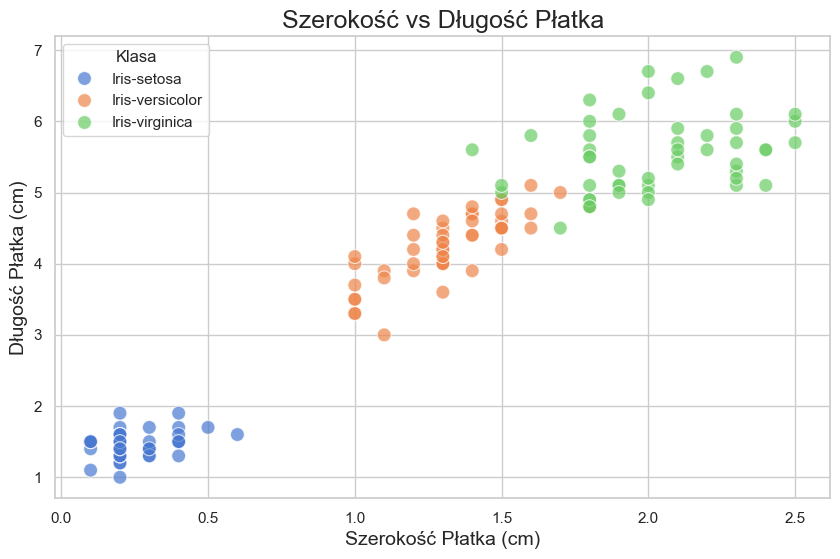

In [71]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 6))
scatter2 = sns.scatterplot(
    x='szerokość płatka', 
    y='długość płatka', 
    hue='klasa', 
    data=df,
    s=100,  # rozmiar markerów
    edgecolor='w',  # kolor krawędzi
    alpha=0.7  # przezroczystość
)
plt.title('Szerokość vs Długość Płatka', fontsize=18)
plt.xlabel('Szerokość Płatka (cm)', fontsize=14)
plt.ylabel('Długość Płatka (cm)', fontsize=14)
plt.legend(title='Klasa')
plt.show()

* We can observe a strong correlation between petal length and petal width. 
* On the other hand, sepal width and sepal length are the least correlated.

In [13]:
matrix = df[["długość kielicha", "szerokość kielicha", "długość płatka", "szerokość płatka"]].corr()

colormap = sns.light_palette("green", as_cmap=True)

matrix_colored = matrix.style.background_gradient(cmap=colormap)

matrix_colored

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka
długość kielicha,1.000000,-0.109369,0.871754,0.817954
szerokość kielicha,-0.109369,1.000000,-0.420516,-0.356544
długość płatka,0.871754,-0.420516,1.000000,0.962757
szerokość płatka,0.817954,-0.356544,0.962757,1.000000


## 6. Outlier Analysis 📊

* We can observe that Iris virginica has the most distant outliers.
* Significant outliers are also present in Iris-setosa.

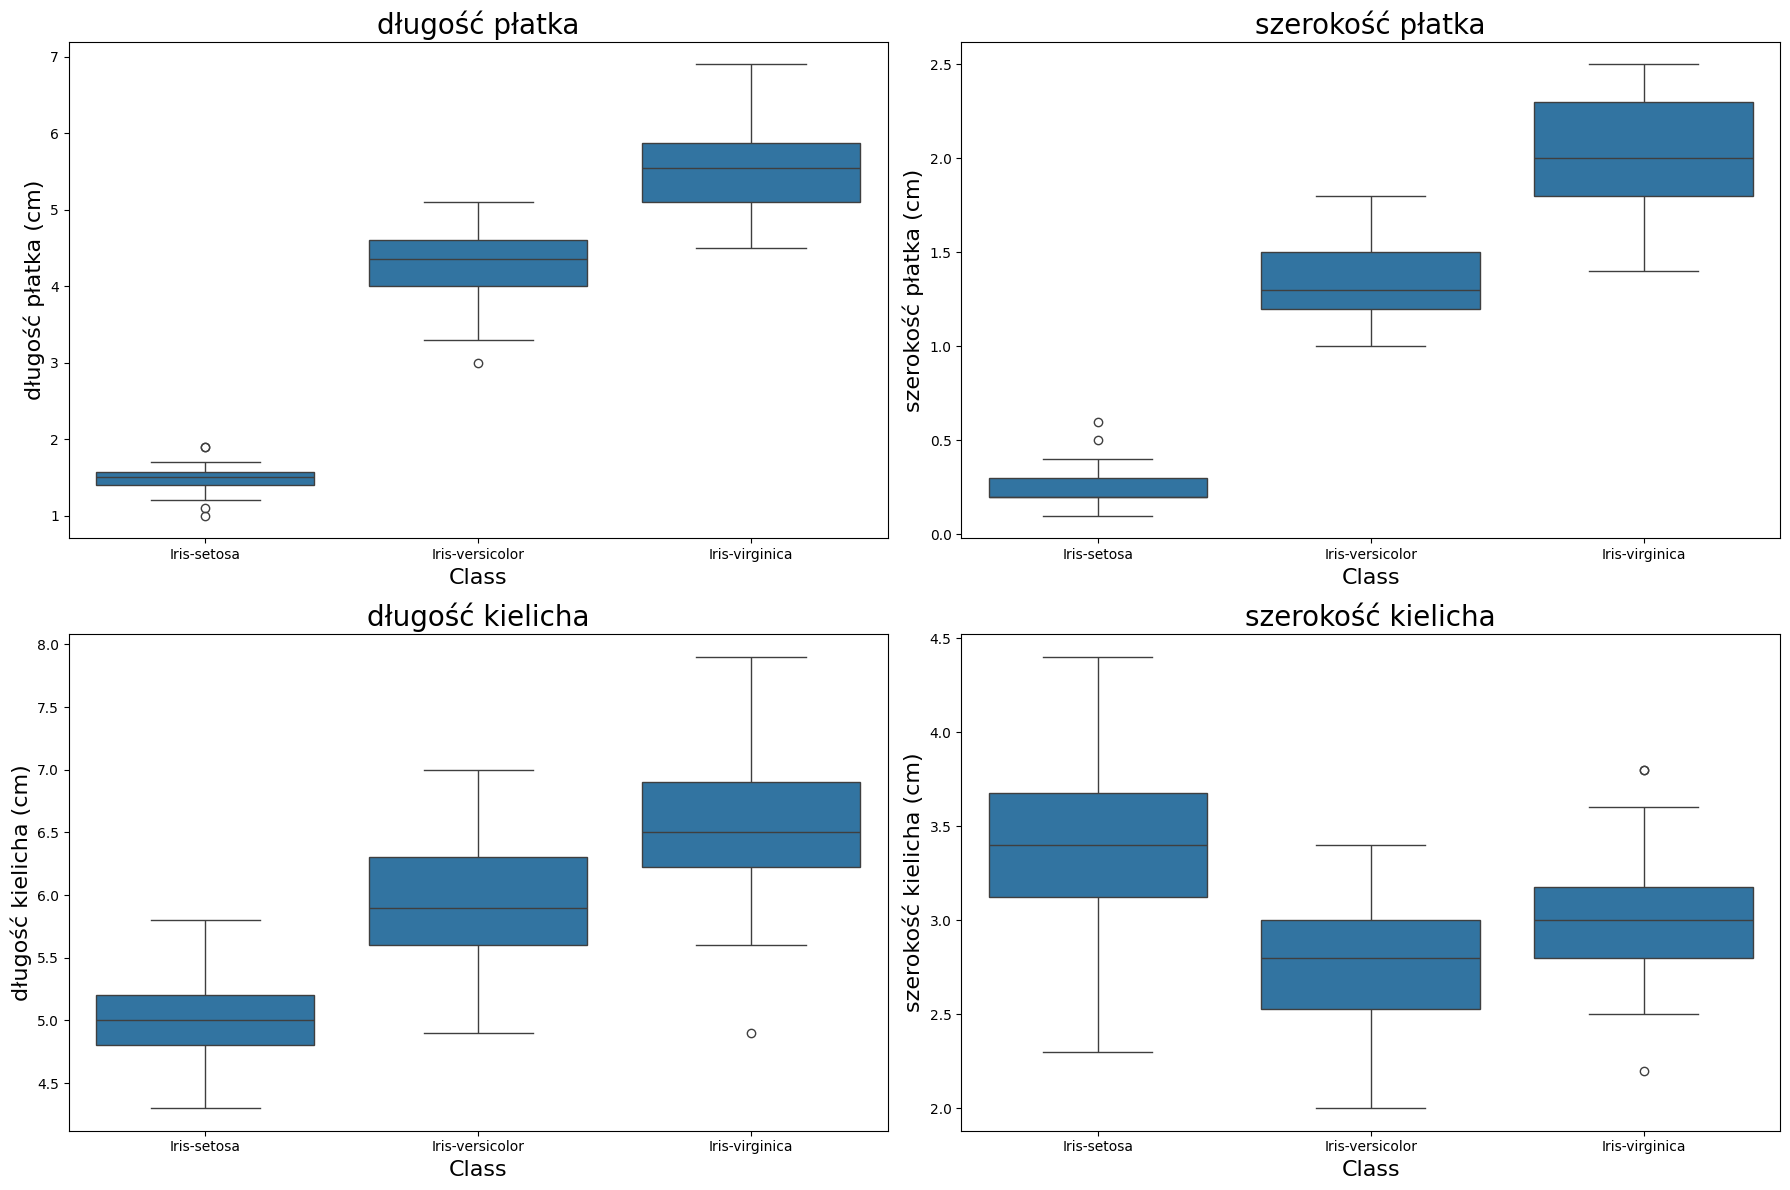

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12)) 

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(data=df, x='klasa', y=col, ax=ax)
    ax.set_title(f'{col}', fontsize=20)
    ax.set_xlabel('Class', fontsize=16)
    ax.set_ylabel(f'{col} (cm)', fontsize=16)

fig.tight_layout()

plt.show()


## Analysis Summary
* The data provided for analysis is of very high quality - no missing values and well diversified.
* By excluding data transformation, we preserved their original quality.
* Sepal length and width are generally larger than petal length and width.
* When comparing petal length and width, the data for each group is very diverse, and each group has unique values.

## Thank you for your attention! Your interest and time mean a lot.

In [78]:
!jupyter nbconvert iris.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook iris.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 669921 bytes to iris.slides.html


In [95]:
!jupyter nbconvert iris.ipynb --to html --no-input --no-prompt --output iris2.html

[NbConvertApp] Converting notebook iris.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 601601 bytes to iris2.html
